In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/DevelopmentData.csv', sep=';')
data.set_index('Unnamed: 0', inplace=True)
data.index.rename('ind', inplace=True)
data.columns

Index(['FirstObjectDistance_X', 'FirstObjectDistance_Y',
       'SecondObjectDistance_X', 'SecondObjectDistance_Y',
       'ThirdObjectDistance_X', 'ThirdObjectDistance_Y',
       'FourthObjectDistance_X', 'FourthObjectDistance_Y', 'VehicleSpeed',
       'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X',
       'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y',
       'FourthObjectSpeed_X', 'FourthObjectSpeed_Y', 'YawRate', 'Timestamp'],
      dtype='object')

In [68]:
data_norm = data.copy()

data_norm[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']] = \
data[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']] / 128

data_norm[['VehicleSpeed', 'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X', 'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y', 'FourthObjectSpeed_X', 'FourthObjectSpeed_Y']] = \
data[['VehicleSpeed', 'FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X', 'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y', 'FourthObjectSpeed_X', 'FourthObjectSpeed_Y']] / 256

data_norm.tail(40)

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
ind,,,,,,,,,,,,,,,,,,,
388,4.500000,-1.164062,77.031250,-16.929688,0.000000,0.000000,9.929688,-6.070312,0.0,0.589844,-1.683594,-0.386719,-1.800781,0.000000,0.000000,-0.128906,-0.191406,0.025085,69.753007
389,4.523438,-1.187500,77.039062,-16.968750,0.000000,0.000000,9.867188,-6.023438,0.0,0.527344,-1.394531,-0.234375,-1.039062,0.000000,0.000000,-0.082031,-0.101562,0.015320,69.834232
390,4.546875,-1.304688,77.039062,-16.812500,0.000000,0.000000,9.843750,-5.992188,0.0,0.484375,-1.500000,0.371094,1.738281,0.000000,0.000000,0.160156,0.214844,-0.020935,69.915210
391,4.609375,-1.429688,77.054688,-16.820312,77.851562,-20.054688,9.851562,-6.015625,0.0,0.464844,-1.507812,-0.222656,-1.117188,-0.253906,-1.128906,-0.105469,-0.128906,0.015320,69.993661
392,4.609375,-1.492188,77.054688,-16.890625,77.921875,-20.031250,9.812500,-5.984375,0.0,0.507812,-1.351562,-0.214844,-0.894531,-0.242188,-0.929688,-0.105469,-0.097656,0.012512,70.075683
393,4.601562,-1.515625,77.039062,-16.789062,77.914062,-20.140625,9.796875,-5.960938,0.0,0.574219,-1.140625,0.234375,1.039062,0.257812,1.000000,0.085938,0.101562,-0.012512,70.160856
394,4.531250,-1.531250,77.062500,-16.734375,77.968750,-20.070312,9.773438,-5.968750,0.0,0.507812,-1.144531,0.183594,0.687500,0.160156,0.687500,0.074219,0.046875,-0.008362,70.246608
395,4.679688,-1.710938,77.062500,-16.828125,0.000000,0.000000,9.773438,-6.023438,0.0,0.632812,-1.226562,-0.093750,-0.515625,0.000000,0.000000,-0.078125,-0.082031,0.006958,70.328764
396,4.781250,-1.835938,77.039062,-16.734375,0.000000,0.000000,9.789062,-6.015625,0.0,0.695312,-1.214844,0.140625,0.695312,0.000000,0.000000,-0.175781,0.207031,-0.008362,70.408939


In [64]:
data_norm.to_csv('../data/data_norm.csv', sep=';')

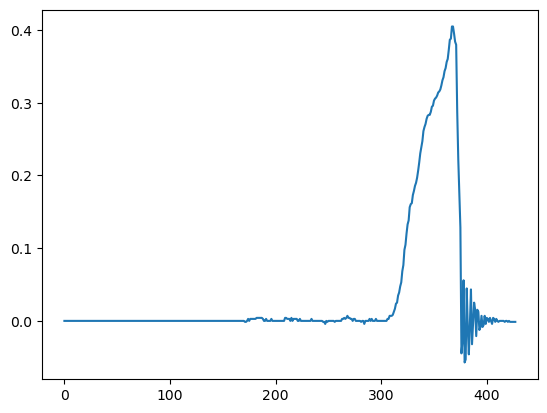

In [65]:

plt.gca().plot(data_norm[['YawRate']])

In [60]:
time_s = data_norm['Timestamp'].copy()
data_norm['prev_timestamp'] = time_s
data_norm['prev_timestamp'] = data_norm['prev_timestamp'].shift(1, fill_value=0)

data_norm['diff'] = data_norm['Timestamp'] - data_norm['prev_timestamp']

temp = data_norm['YawRate'] * data_norm['diff']
temp.sum() * (180 / np.pi)

66.56015570921701

In [30]:
import numpy as np
temp = data_norm[['YawRate']] * 0.1
temp.sum() * (180 / np.pi)

YawRate    85.294616
dtype: float64

In [115]:
m_1odx = data_norm['FirstObjectDistance_X'] != 0
m_1odx = data_norm['FirstObjectDistance_Y'] != 0
m_2odx = data_norm['SecondObjectDistance_X'] != 0
m_2odx = data_norm['SecondObjectDistance_Y'] != 0
m_3odx = data_norm['ThirdObjectDistance_X'] != 0
m_3odx = data_norm['ThirdObjectDistance_Y'] != 0
m_4odx = data_norm['FourthObjectDistance_X'] != 0
m_4odx = data_norm['FourthObjectDistance_Y'] != 0

m1 = data_norm['VehicleSpeed'] == -data_norm['FirstObjectSpeed_X']
m2 = data_norm['VehicleSpeed'] == -data_norm['SecondObjectSpeed_X']
m3 = data_norm['VehicleSpeed'] == -data_norm['ThirdObjectSpeed_X']
m4 = data_norm['VehicleSpeed'] == -data_norm['FourthObjectSpeed_X']
ms = data_norm['VehicleSpeed'] != 0
data_norm[ms & m3]


,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
ind,,,,,,,,,,,,,,,,,,,
216,54.500000,11.718750,64.695312,-11.351562,73.250000,11.359375,67.710938,11.781250,4.000000,-3.449219,-0.027344,-3.984375,-0.078125,-4.000000,0.066406,-3.972656,0.128906,0.000000,54.174628
226,51.679688,12.000000,60.320312,-11.976562,68.796875,11.226562,63.789062,11.828125,4.164062,-3.128906,0.027344,-4.195312,-0.062500,-4.164062,0.027344,-4.167969,0.011719,0.000000,55.157550
242,46.140625,12.570312,53.515625,-12.101562,62.296875,11.226562,57.171875,13.367188,4.261719,-3.359375,0.054688,-4.253906,0.023438,-4.261719,0.035156,-4.250000,0.035156,0.000000,56.681563
260,38.695312,13.156250,45.906250,-13.328125,55.046875,11.492188,50.195312,13.796875,4.246094,-4.613281,0.070312,-4.257812,-0.039062,-4.246094,0.027344,-4.257812,0.011719,0.000000,58.381618
261,38.187500,13.179688,45.289062,-13.085938,54.578125,11.593750,49.703125,13.812500,4.253906,-4.644531,0.046875,-4.265625,0.000000,-4.253906,0.066406,-4.250000,0.011719,0.000000,58.476985
266,36.242188,13.234375,42.796875,-13.031250,52.695312,11.632812,47.781250,13.765625,4.261719,-4.675781,-0.078125,-4.316406,-0.257812,-4.261719,-0.085938,-4.265625,-0.144531,0.002747,58.955783
273,33.250000,13.421875,39.039062,-13.460938,49.632812,11.359375,44.585938,13.609375,4.238281,-4.886719,0.039062,-4.304688,-0.171875,-4.238281,-0.007812,-4.246094,0.000000,0.000000,59.655479


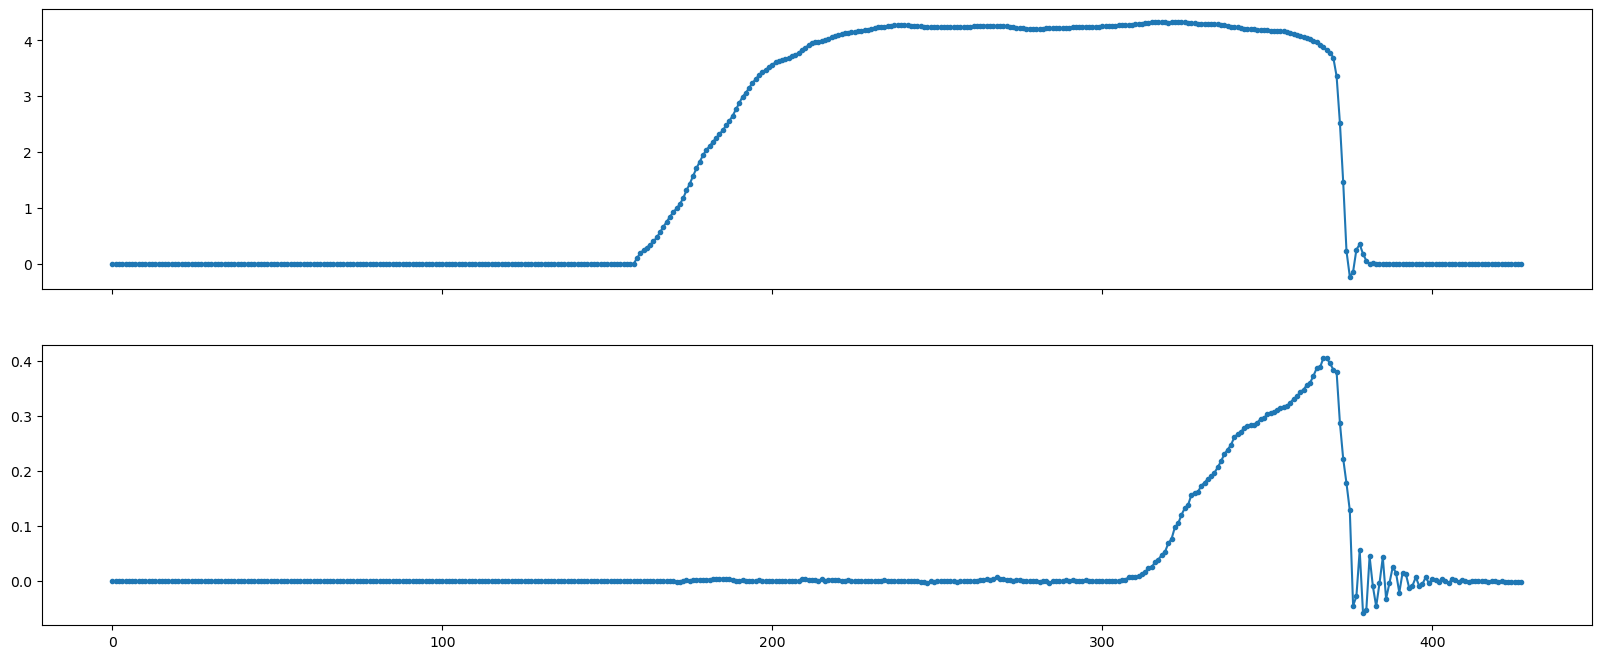

In [141]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=False, sharex=True)
fig.set_size_inches(20,8)
ax1.plot(data_norm[['VehicleSpeed']], marker='.')
ax2.plot(data_norm[['YawRate']], marker='.')

In [111]:
data_norm[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'FirstObjectSpeed_X', 'FirstObjectSpeed_Y']]

,FirstObjectDistance_X,FirstObjectDistance_Y,FirstObjectSpeed_X,FirstObjectSpeed_Y
ind,,,,
0,64.148438,11.281250,-0.007812,0.000000
1,64.125000,11.273438,-0.015625,0.000000
2,64.148438,11.281250,-0.011719,0.000000
3,64.132812,11.289062,-0.015625,0.000000
4,64.132812,11.289062,0.000000,0.003906
...,...,...,...,...
423,6.109375,-4.601562,1.093750,-0.687500
424,6.445312,-4.835938,2.718750,-0.597656
425,6.406250,-4.929688,2.632812,-0.597656


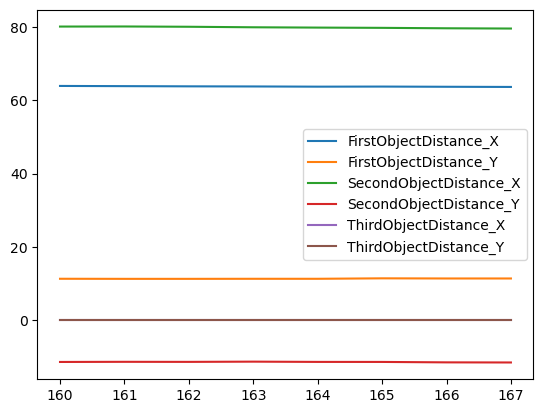

In [105]:
ax = plt.gca()
ax.plot(data_norm[160:168][['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y']])
ax.legend(['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y'])

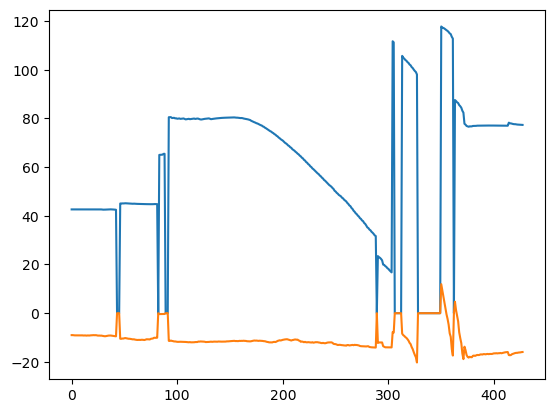

In [19]:

plt.gca().plot(data_norm[['SecondObjectDistance_X', 'SecondObjectDistance_Y']])

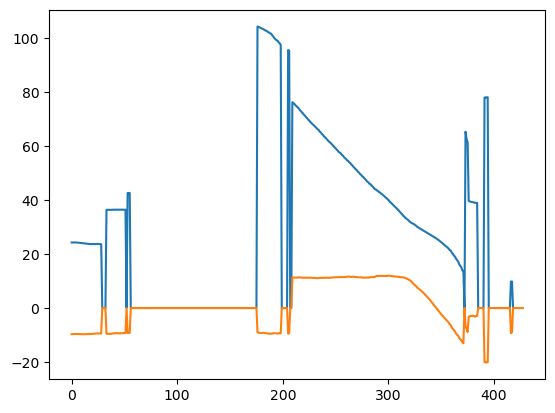

In [72]:

plt.gca().plot(data_norm[['ThirdObjectDistance_X', 'ThirdObjectDistance_Y']])

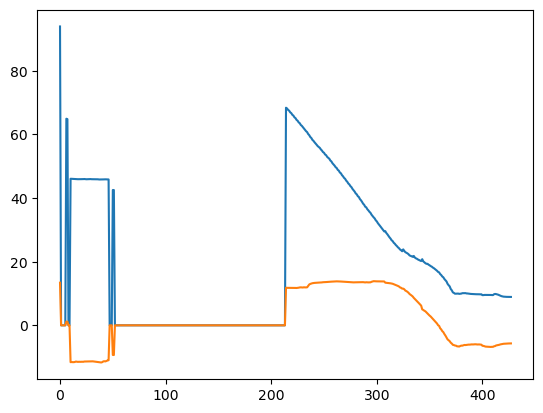

In [70]:

plt.gca().plot(data_norm[['FourthObjectDistance_X', 'FourthObjectDistance_Y']])

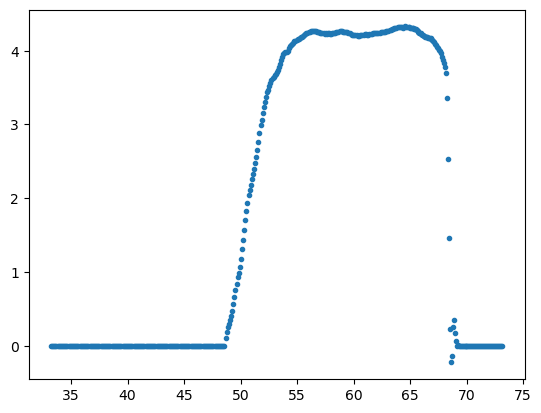

In [6]:
plt.gca().scatter(data_norm['Timestamp'], data_norm['VehicleSpeed'], marker='.')

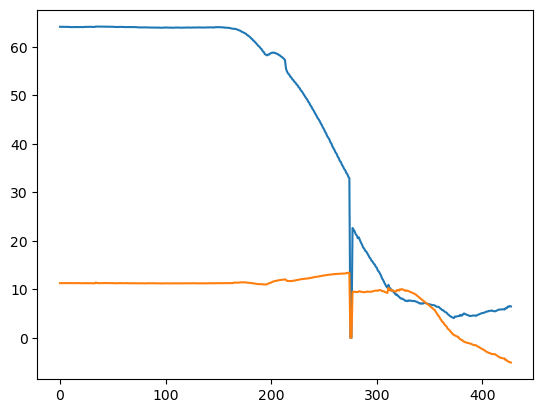

In [67]:
plt.gca().plot(data_norm[['FirstObjectDistance_X', 'FirstObjectDistance_Y']])

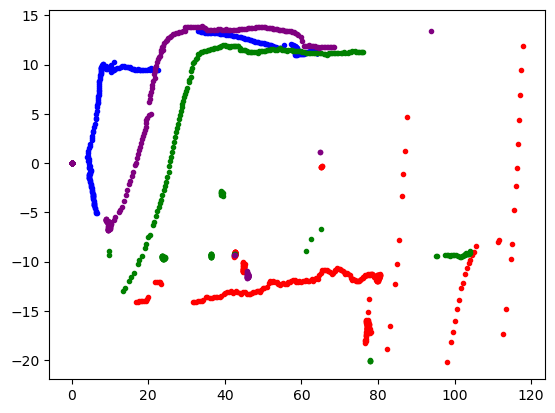

In [11]:

plt.gca().scatter(data_norm['FirstObjectDistance_X'], data_norm['FirstObjectDistance_Y'], marker='.', c='Blue')
plt.gca().scatter(data_norm['SecondObjectDistance_X'], data_norm['SecondObjectDistance_Y'], marker='.', c='Red')
plt.gca().scatter(data_norm['ThirdObjectDistance_X'], data_norm['ThirdObjectDistance_Y'], marker='.', c='Green')
plt.gca().scatter(data_norm['FourthObjectDistance_X'], data_norm['FourthObjectDistance_Y'], marker='.', c='Purple')

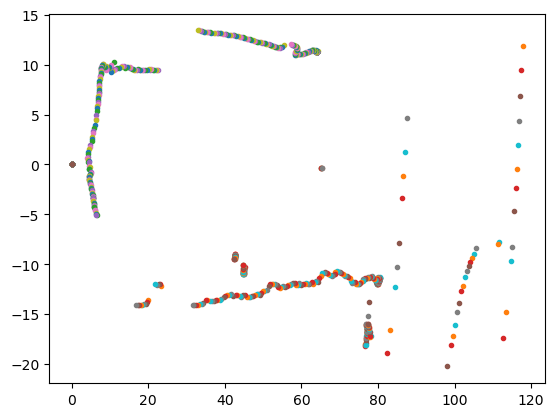

In [62]:
for e in data_norm.values:
    plt.gca().scatter(e[0], e[1], marker='.')
    plt.gca().scatter(e[2], e[3], marker='.')